# Introduction
In this project, we will generate Gaussian Pyramid and Laplacian Pyramid given an image. They are discussed in the paper [BURT, P.J. and ADELSON, E.H., 1983. The Laplacian Pyramid as a Compact Image Code. IEEE TRANSACTIONS ON COMMUNICATIONS, 3(4).](http://www.cs.tau.ac.il/~hezy/Vision%20Seminar/pyramid83.pdf) and you are encouraged to read it to understand the background of it.

In this Jupyter Notebook, we will split this task into several subtasks. Please follow the instruction for each of them.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import time
import numpy as np
import urllib
import cv2

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from p1 import *

# 0 Preparation
Run the following cell, and you should get an image with size $512*512$;  
We also initialize a kernel $W$ which will be used later.

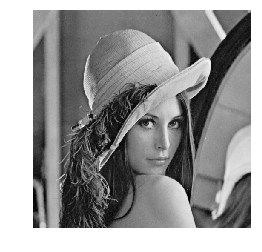

In [3]:
resp = urllib.request.urlopen('https://www.ece.rice.edu/~wakin/images/lena512.pgm')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, 0)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

W = np.array([[0.0025, 0.0125, 0.0200, 0.0125, 0.0025], \
              [0.0125, 0.0625, 0.1000, 0.0625, 0.0125], \
              [0.0200, 0.1000, 0.1600, 0.1000, 0.0200], \
              [0.0125, 0.0625, 0.1000, 0.0625, 0.0125], \
              [0.0025, 0.0125, 0.0200, 0.0125, 0.0025]
             ])

# 1 Convolution
Implement convolution (we call it convolution but we are actually computing **cross-correlation** here) given an image and a convolution kernel. We assume the kernel is a square of size $M*M$ where $M$ is an odd number. The output should have the same size as the input image by doing **[zero padding](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html#zero-padding-unit-strides)** over the input image.
``` python
def conv(image, kernel):
    # TODO
    return conved_image
```
Inputs:
* image: a numpy array of size $H*W$, type np.uint8, range 0~255
* kernel: a numpy array of size $M*M$, type np.float

Output:
* return a numpy array of size $H*W$, type np.uint8, range 0~255

Caveat: the image data type is np.uint8 while the kernel data type is np.float; it may require some special handling about the data type.

Scores: 2

Time: 12.68
Result match


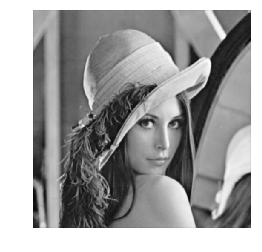

In [4]:
# Verification
conv_opencv = lambda x, k: cv2.filter2D(x,-1,k,borderType=cv2.BORDER_CONSTANT)
ts = time.time()
res = conv(image, W)
print('Time: {:.2f}'.format(time.time() - ts))
try:
    np.testing.assert_allclose(res,conv_opencv(image, W),rtol=0,atol=1)
    print('Result match')
except Exception as e:
    print(str(e))
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Extensive testing
cnt_pass = 0
cnt_total = 0
ts = time.time()
for _ in range(10):
    rand_img = np.random.randint(0,256,(512,512),dtype=np.uint8)
    rand_kernel = np.random.rand(13,13)
    cnt_total += 1
    try:
        np.testing.assert_allclose(conv(rand_img, rand_kernel),conv_opencv(rand_img, rand_kernel),rtol=0,atol=1)
        cnt_pass += 1
    except:
        pass
    rand_kernel = rand_kernel/rand_kernel.sum()
    cnt_total += 1
    try:
        np.testing.assert_allclose(conv(rand_img, rand_kernel),conv_opencv(rand_img, rand_kernel),rtol=0,atol=1)
        cnt_pass += 1
    except:
        pass
print('Time: {:.2f}'.format(time.time() - ts))
print('{}% passed'.format(100*cnt_pass/cnt_total))

# 2 Downsample
Implement a downsample function, which shrink the shape of input by factor of 2. We assume that the height and width of the input is an even number. This function does downsampling by ask $downsampled\_image[i,j]=image[2i,2j]$.
``` python
def downsample(image):
    # TODO
    return downsampled_image
```
Inputs:
* image: a numpy array of size $H*W$, type np.uint8, range 0~255; both H and W are even numbers

Output:
* return a numpy array of size $H//2*W//2$, type np.uint8, range 0~255

Scores: 2

Time: 0.05
Result match


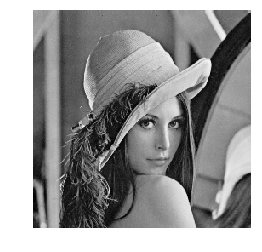

In [5]:
# Verification
downsample_opencv = lambda x: cv2.resize(x,(0,0),fx=0.5,fy=0.5,interpolation=cv2.INTER_NEAREST)
ts = time.time()
res = downsample(image)
print('Time: {:.2f}'.format(time.time() - ts))
try:
    np.testing.assert_allclose(res,downsample_opencv(image),rtol=0,atol=1)
    print('Result match')
except Exception as e:
    print(str(e))
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Extensive testing
cnt_pass = 0
cnt_total = 0
ts = time.time()
for _ in range(10):
    rand_img = np.random.randint(0,256,(512,512),dtype=np.uint8)
    cnt_total += 1
    try:
        np.testing.assert_allclose(downsample(rand_img),downsample_opencv(rand_img),rtol=0,atol=0)
        cnt_pass += 1
    except:
        pass
print('Time: {:.2f}'.format(time.time() - ts))
print('{}% passed'.format(100*cnt_pass/cnt_total))

# 3 Gaussian Pyramid
Build a Gaussian Pyramid by doing downsampling and Gaussian blurring multiple times.  
Specifically, the 0-th element of the pyramid is the origin image, and the (i+1)-th element is generated by downsampling the i-th element and then do Gaissuan blulrring over the downsampled image.

You can do the Gaussian blurring by doing convolution over the input with kernel $W$ (it is given in [# 0 Preparation](#0-Preparation)):

\begin{equation*}
\mathbf{W} =  \left[ \begin{array}\\
0.0025 & 0.0125 & 0.0200 & 0.0125 & 0.0025 \\
0.0125 & 0.0625 & 0.1000 & 0.0625 & 0.0125 \\
0.0200 & 0.1000 & 0.1600 & 0.1000 & 0.0200 \\
0.0125 & 0.0625 & 0.1000 & 0.0625 & 0.0125 \\
0.0025 & 0.0125 & 0.0200 & 0.0125 & 0.0025
\end{array} \right]
\end{equation*}

So mathematically, you will have the following recursive formula:  
G[0] = image; G[i+1] = conv(downsample(G[i]), W) for i=0,1,2,...,k-1
``` python
def gaussianPyramid(image, W, k):
    # TODO
    return G
```
Input:
* image: a numpy array of size $H*W$, type np.uint8, range 0~255; both H and W are multiple of $2^k$
* W: a numpy array of size $M*M$, type np.float, range $-\infty \sim \infty$, $M$ is an odd number

Output:
* return a list (length k+1) of numpy array, where the 0-th element is identical to image; and the i-th element is G[i] with size $\frac{H}{2^i}*\frac{W}{2^i}$, type np.uint8, range 0~255.

Scores: 5

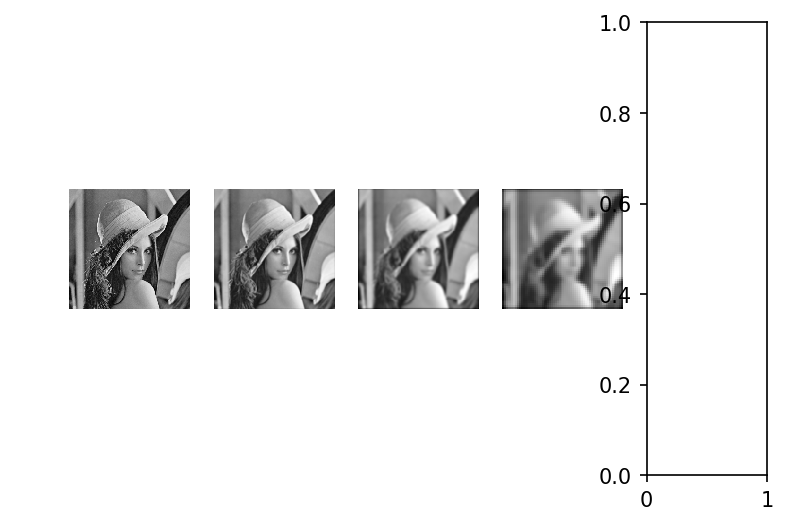

In [6]:
# Verification
G = gaussianPyramid(image, W, 4)
fig, axs = plt.subplots(1,5, dpi=150.)
for ax, g in zip(axs, G):
    ax.imshow(g, cmap='gray')
    ax.axis('off')
plt.show()

# 4 Upsamle
Implement a upsample function, which expand the shape of input by factor of 2. This function does upsampling by asking $$upsampled\_image[2i,2j]=image[i,j]\\
upsampled\_image[2i+1,2j]=0\\
upsampled\_image[2i,2j+1]=0\\
upsampled\_image[2i+1,2j+1]=0$$

**Note that this is not a typical upsampling, since it will add 0 on odd positions, and it may only be useful in our task.** Some typical image scaling algorithms are described in [Comparison gallery of image scaling algorithms](https://www.wikiwand.com/en/Comparison_gallery_of_image_scaling_algorithms)

``` python
def upsample(image):
    # TODO
    return upsampled_image
```
Inputs:
* image: a numpy array of size $H*W$, type np.uint8, range 0~255

Output:
* return a numpy array of size $2H*2W$, type np.uint8, range 0~255

Scores: 2

Upsampling generated by our method:


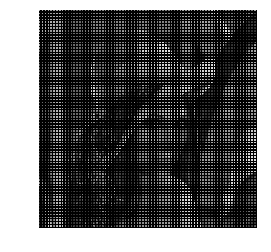

Upsampling generated by opencv:


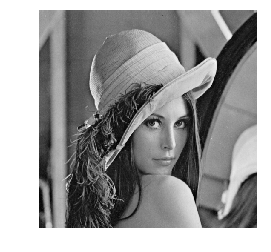

In [7]:
# Verification
up_opencv = lambda x: cv2.resize(x,(0,0),fx=2,fy=2,interpolation=cv2.INTER_NEAREST)
res = upsample(image)
print('Upsampling generated by our method:')
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()
print('Upsampling generated by opencv:')
plt.imshow(up_opencv(image), cmap='gray')
plt.axis('off')
plt.show()

# 5 Laplacian Pyramid
Finally we will generate a Laplacian Pyramid. Each element of the pyramid L[i] is the difference between the Gaussian pyramid element G[i] and the expanded Gaussian pyramid element G[i+1]. To do the expanding, we first do upsampling over image G[i+1], and then do convolution over the upsampled image with kernel $4*W$. Mathematically: L[i] = G[i] - conv(upsample(G[i+1]), 4W).

To plot L[i] more clearly, we add a constant 128 to L[i]. So finally L[i] = G[i] - conv(upsample(G[i+1]), 4W) + 128.

``` python
def laplacianPyramid(G, W):
    # TODO
    return L
```
Input:
* G: a list of numpy array for Gaussian Pyramid, type np.uint8, range 0~255
* W: a numpy array of size $M*M$, type np.float, range $-\infty \sim \infty$, $M$ is an odd number

Output:
* return a list (length len(G)-1) of numpy array, where L[i] = G[i] - conv(upsample(G[i+1]), 4W) + 128, type np.uint8, range 0~255

Scores: 5

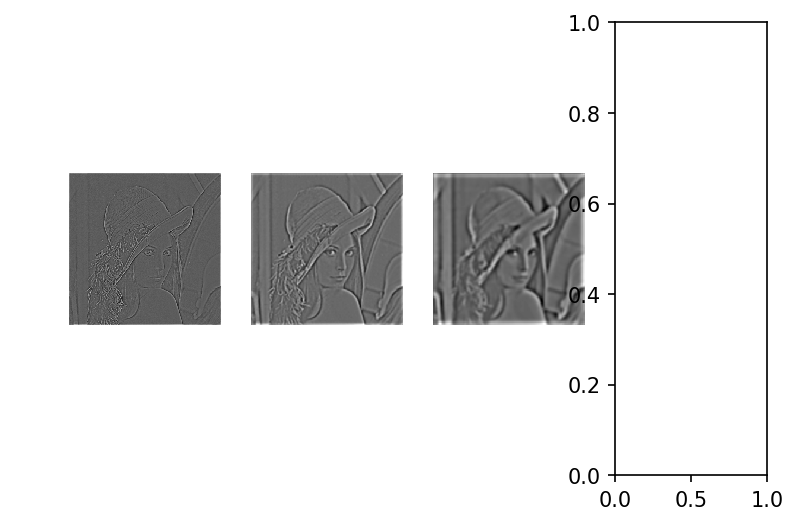

In [8]:
# Verification
L = laplacianPyramid(G, W)
fig, axs = plt.subplots(1,4, dpi=150.)
for ax, l in zip(axs, L):
    ax.imshow(l, cmap='gray')
    ax.axis('off')
plt.show()